In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
data = pd.read_csv(r"E:\MyJupyterNotebooks\wisconsin_breastcancer\data.csv")

In [5]:
mean_radius = data.radius_mean
classification = data.diagnosis

In [6]:
data["diagnosis_bool"] = classification.replace({'B': 0, 'M': 1})
classification_bool = data.diagnosis_bool

EDA (no feature scaling and log transformations). Using mean radius as prediction for malignancy.

<Axes: title={'center': 'Diagnosis according to mean radius'}, xlabel='Mean Radius', ylabel='Diagnosis'>

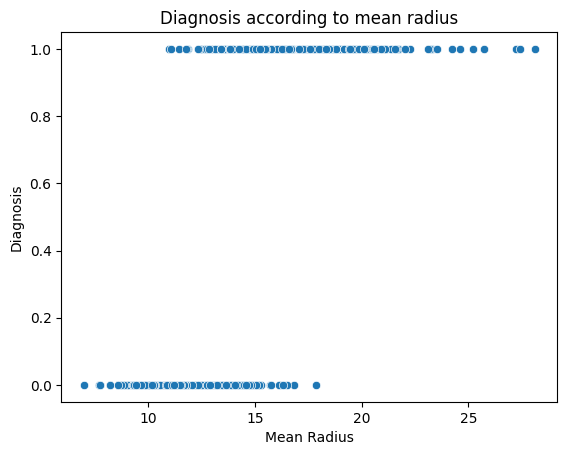

In [7]:
plt.title('Diagnosis according to mean radius')
plt.xlabel('Mean Radius')
plt.ylabel('Diagnosis')
sns.scatterplot(data=data, x=mean_radius, y=classification_bool)

<Axes: xlabel='radius_mean'>

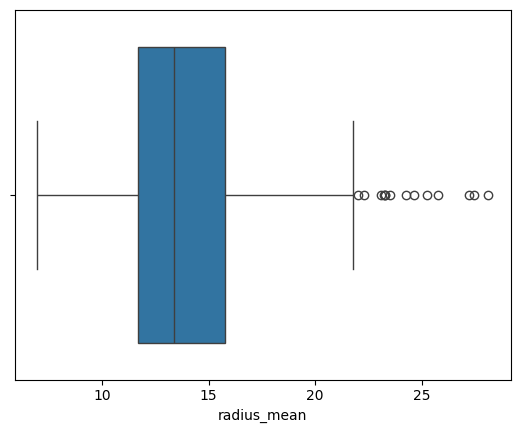

In [8]:
sns.boxplot(data=data, x=mean_radius)

In [9]:
mean_radius.skew()

0.9423795716730992

In [10]:
corr_radius_diag = data[['radius_mean', 'diagnosis_bool']].corr()
corr_radius_diag

,radius_mean,diagnosis_bool
radius_mean,1.000000,0.730029
diagnosis_bool,0.730029,1.000000


<Axes: title={'center': 'Diagnosis vs mean radius'}, xlabel='Mean Radius', ylabel='Diagnosis'>

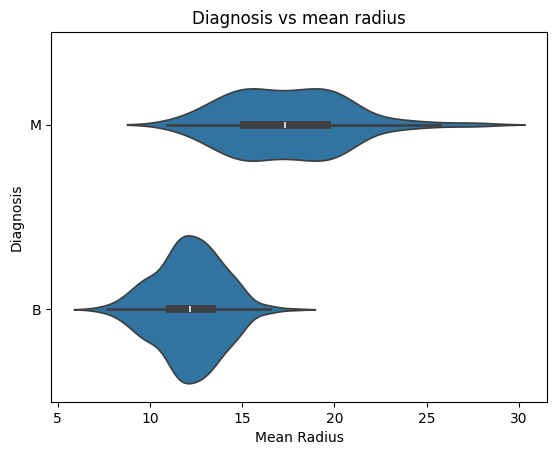

In [11]:
plt.title('Diagnosis vs mean radius')
plt.xlabel('Mean Radius')
plt.ylabel('Diagnosis')
sns.violinplot(data=data, x="radius_mean", y="diagnosis")

EDA (no feature scaling and log transforms). Check if other features are relevant.

In [12]:
# Remove the unnamed column, diagnosis column, and id
data_two = data.drop(columns=['Unnamed: 32', 'diagnosis', 'id'])
corr_all_features = data_two[data_two.columns].corr()


Use of Variance Inflation Factor

In [13]:
# consider radius_mean, concavity_worst, and diagnosis_bool as features
X = data_two[['radius_mean', 'concavity_worst']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.sort_values(by="VIF")

,Feature,VIF
0,radius_mean,3.556768
1,concavity_worst,3.556768


In [14]:
# Check correlation of radius_mean, concave points_worst, and diagnosis_bool
corr_rad_conc_diag = data_two[['radius_mean', 'concave points_worst', 'diagnosis_bool']].corr()
corr_rad_conc_diag


,radius_mean,concave points_worst,diagnosis_bool
radius_mean,1.000000,0.744214,0.730029
concave points_worst,0.744214,1.000000,0.793566
diagnosis_bool,0.730029,0.793566,1.000000


Use 'concave points_worst' 

Modeling 

Iteration: 0, w: 0.13, b: 0.08, J(w, b): -0.42
Iteration: 1, w: 0.16, b: 0.07, J(w, b): -0.42
Iteration: 2, w: 0.20, b: 0.06, J(w, b): -0.43
Iteration: 3, w: 0.23, b: 0.04, J(w, b): -0.43
Iteration: 4, w: 0.26, b: 0.03, J(w, b): -0.43
Iteration: 5, w: 0.29, b: 0.01, J(w, b): -0.44
Iteration: 6, w: 0.31, b: 0.00, J(w, b): -0.44
Iteration: 7, w: 0.34, b: -0.01, J(w, b): -0.44
Iteration: 8, w: 0.37, b: -0.02, J(w, b): -0.45
Iteration: 9, w: 0.39, b: -0.04, J(w, b): -0.45
Iteration: 10, w: 0.42, b: -0.05, J(w, b): -0.45
Iteration: 11, w: 0.45, b: -0.06, J(w, b): -0.46
Iteration: 12, w: 0.47, b: -0.07, J(w, b): -0.46
Iteration: 13, w: 0.49, b: -0.08, J(w, b): -0.46
Iteration: 14, w: 0.52, b: -0.09, J(w, b): -0.46
Iteration: 15, w: 0.54, b: -0.10, J(w, b): -0.47
Iteration: 16, w: 0.56, b: -0.11, J(w, b): -0.47
Iteration: 17, w: 0.59, b: -0.12, J(w, b): -0.47
Iteration: 18, w: 0.61, b: -0.13, J(w, b): -0.47
Iteration: 19, w: 0.63, b: -0.14, J(w, b): -0.48
Iteration: 20, w: 0.65, b: -0.15, J(w

(1.0861788207387726, -0.32644565399783027)

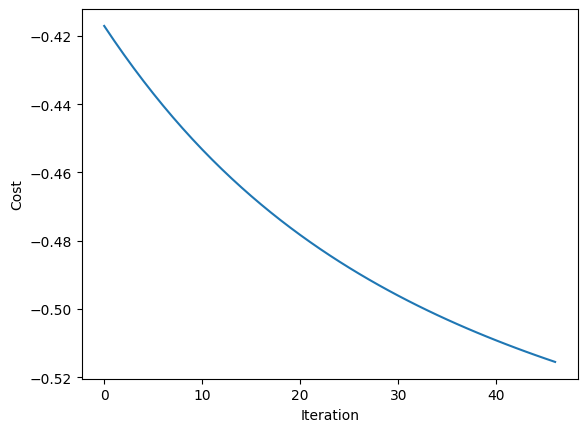

In [16]:
# Setup variables for gradient descent function call
X = stats.zscore(mean_radius)
y = classification_bool
w_init = 0.1
b_init = 0.1
learning_rate = 0.1
m = X.shape[0]
no_iterations = 50

w, b = gradient_descent_logistic(X=X, y=y, w_init=w_init, b_init=b_init, learning_rate=learning_rate, m=m, no_iterations=no_iterations)
w, b

<Axes: title={'center': 'Logistic function fit'}, xlabel='Standardized tumor size', ylabel='P(Y=1)'>

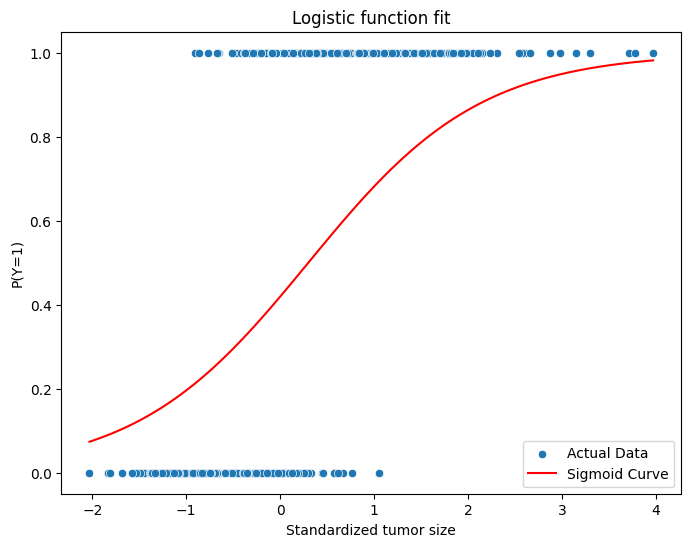

In [17]:
X_range = np.linspace(X.min(), X.max(), 100)
y_sigmoid = 1 / (1 + np.exp(-(w * X_range + b)))

# Scatter plot of actual data
plt.figure(figsize=(8, 6))
plt.xlabel('Standardized tumor size')
plt.ylabel('P(Y=1)')
plt.title('Logistic function fit')
sns.scatterplot(x=X, y=y, label='Actual Data')

sns.lineplot(x=X_range, y=y_sigmoid, color='red', label='Sigmoid Curve')